In [1]:
# Install the environnement
%pip install git+https://github.com/AwePhD/NotebooksLabsessionImage.git

  Cloning https://github.com/AwePhD/NotebooksLabsessionImage.git to /tmp/pip-req-build-3vdf1de3
  Running command git clone -q https://github.com/AwePhD/NotebooksLabsessionImage.git /tmp/pip-req-build-3vdf1de3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for NLI: filename=NLI-1.0.0-py3-none-any.whl size=2406 sha256=1560bca79741ab76575f29d7909879ca0bdb2ee81d8ce93d940f944b7820964b
  Stored in directory: /tmp/pip-ephem-wheel-cache-c4y459bw/wheels/17/4a/a4/4f920391e876c3c2632ecc7851748e1c11539349fe2eefd2c4
Successfully built NLI


In [2]:
# Import dataset 
# Can be found at https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types
!rm -rf ./*
!curl -LO https://github.com/AwePhD/NotebooksLabsessionImage/raw/main/pokemon_dataset.zip
!unzip -qq pokemon_dataset.zip
!rm pokemon_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   156  100   156    0     0    445      0 --:--:-- --:--:-- --:--:--   444
100 2484k  100 2484k    0     0  4155k      0 --:--:-- --:--:-- --:--:-- 4155k


In [19]:
# Standard imports
from pathlib import Path
from pprint import pprint
from typing import List, Dict

# Third party imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage import img_as_float, img_as_ubyte
from skimage import exposure

# Local imports
from NLI.utils import (
    iprint,
    print_img_info
)

## What is an image ?

An image is a 2D data with one or more channels for each pixels: grayscale image have 1 channels, RGB images have 3 channels, hyperspectrale images might have dozen of channels.

The best way to process images is to use an existing image library. There are multiple image libraries depending on the process' needs. For this notebook, the Scikit-image *aka* skimage is used. This library uses `ndarray` with 3 dimensions to represent images RGB images.

### Import an image

Simply, type the path of the image with `imread`.

In [6]:
img = io.imread("images/pikachu.png")

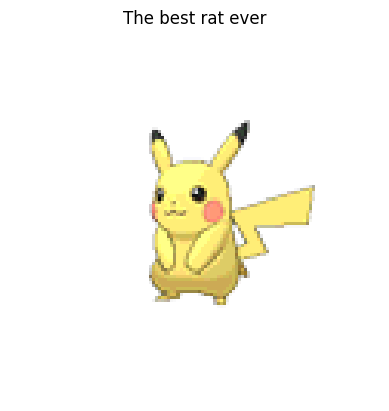

In [14]:
plt.figure()
plt.axis("off")
plt.title("The best rat ever")
io.imshow(img)
plt.show()

### Explore an image

As said previously, skimage use the object of `ndarray` to represents image. Eventually, `ndarray` is an object. In short, an object is a data structure - a variable that contains more or less data - with a specific behaviour. 

For instance, an `ndarray` for an image would contain all the data about the image - the value of each pixel. Plus we will be able to do some operation on this image easily without writing much code : stat informations, image informations, basic arithmetics ...

In [7]:
print(
    f"type(img): {type(img)}\n"
    f"img.shape: {img.shape}\n"
    f"img.dtype: {img.dtype}\n"
    f"Range: {img.min()}-{img.max()}\n"
)

type(img): <class 'numpy.ndarray'>
img.shape: (120, 120, 4)
img.dtype: uint8
Range: 0-255



We can convert the data inside the image in other data types. This can be useful while you are processing images with your own functions or with functions library. Maybe these functions make the asumption of the data type of the image.

In [8]:
print_img_info(img_as_float(img))

img.shape: (120, 120, 4)
img.dtype: float64
Range of value: 0.0-1.0



In [9]:
print_img_info(img_as_ubyte(img))

img.shape: (120, 120, 4)
img.dtype: uint8
Range of value: 0-255



### More details data type, values range and plotting

Now we will illustrate how the data type and the range of values are important to plot an image.

In the notebook of `numpy` we stressed that the data type and what values are in our `ndarray` is very important to know. We will see that if we mix the wrong range with the wront data type then it gets messy.

In [17]:
img_float_255_range = img.astype(np.float64)
print_img_info(img_float_255_range)

img.shape: (120, 120, 4)
img.dtype: float64
Range of value: 0.0-255.0



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


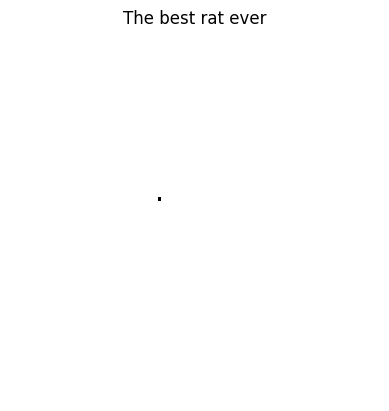

In [18]:
plt.figure()
plt.axis("off")
plt.title("The best rat ever")
plt.imshow(img_float_255_range)
plt.show()

It does not work. With `dtype` as `float64`, Python is expecting pixel values from 0 to 1. For values range and data type, we can check the [documentation of scikit-image](https://scikit-image.org/docs/stable/user_guide/data_types.html#rescaling-intensity-values)